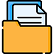**ENTREGA DATA ANALYTICS con PHYTON**

Etapa 1


*1*- Carga de Datos



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 1-Data sets originales
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Nueva sección

In [ ]:
import os
os.listdir("/content/drive/MyDrive/Datasets")

['Copia de clientes.gsheet',
 'Copia de marketing.gsheet',
 'ventas.csv',
 'clientes.csv',
 'marketing.csv',
 'Copia de ventas.gsheet',
 'clientes_clean.csv',
 'ventas_clean.csv',
 'marketing_clean.csv']

In [ ]:
# Defino las rutas
ruta_ventas = "/content/drive/MyDrive/Datasets/ventas.csv"
ruta_clientes = "/content/drive/MyDrive/Datasets/clientes.csv"
ruta_marketing = "/content/drive/MyDrive/Datasets/marketing.csv"

# cargo los CSV en DF
df_ventas = pd.read_csv(ruta_ventas)
df_clientes = pd.read_csv(ruta_clientes)
df_marketing = pd.read_csv(ruta_marketing)

#Compruebo que los datos estan cargados
df_ventas.head()

display(df_ventas.head(4))
display(df_clientes.head(4))
display(df_marketing.head(4))

print(df_ventas.shape)

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024


(3035, 6)


4- Exploracion  con Pandas

In [ ]:
def eda(df, nombre):
    print(f"=== {nombre} ===")
    print("shape:", df.shape)
    print("columnas:", list(df.columns))
    print("dtypes:")
    print(df.dtypes)
    print("\nNulos por columna:")
    print(df.isna().sum())
    print("\nPrimeras filas:")
    display(df.head(5))
    print("\nDescribe (numérico):")
    display(df.describe(include='number'))
    print("-"*100)

In [ ]:
eda(df_ventas, "VENTAS (inicial)")

=== VENTAS (inicial) ===
shape: (3035, 6)
columnas: ['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria']
dtypes:
id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object

Nulos por columna:
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64

Primeras filas:


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos



Describe (numérico):


,id_venta,cantidad
count,3035.000000,3033.000000
mean,1499.851400,6.496538
std,866.465379,3.457250
min,1.000000,1.000000
25%,748.500000,3.000000
50%,1502.000000,7.000000
75%,2249.500000,9.000000
max,3000.000000,12.000000


----------------------------------------------------------------------------------------------------


In [ ]:
eda(df_clientes, "CLIENTES (inicial)")

=== CLIENTES (inicial) ===
shape: (567, 5)
columnas: ['id_cliente', 'nombre', 'edad', 'ciudad', 'ingresos']
dtypes:
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object

Nulos por columna:
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64

Primeras filas:


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65



Describe (numérico):


,id_cliente,edad,ingresos
count,567.000000,567.000000,567.000000
mean,284.000000,37.940035,34668.739012
std,163.823075,10.202885,12974.531446
min,1.000000,20.000000,170.290000
25%,142.500000,30.000000,26015.240000
50%,284.000000,37.000000,35066.830000
75%,425.500000,43.000000,42457.100000
max,567.000000,81.000000,88053.010000


----------------------------------------------------------------------------------------------------


In [ ]:
eda(df_marketing, "MARKETING (inicial)")

=== MARKETING (inicial) ===
shape: (90, 6)
columnas: ['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio', 'fecha_fin']
dtypes:
id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object

Nulos por columna:
id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64

Primeras filas:


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024



Describe (numérico):


,id_campanha,costo
count,90.000000,90.000000
mean,45.500000,4.928667
std,26.124701,0.947750
min,1.000000,2.950000
25%,23.250000,4.372500
50%,45.500000,4.900000
75%,67.750000,5.562500
max,90.000000,7.390000


----------------------------------------------------------------------------------------------------


5- Calidad de Datos





In [ ]:
#Muestra el titulo descriptivo del df
def calidad(df, nombre, clave=None):
#Muestra cantidad de nulos por columna
    display(df.isna().sum().to_frame("nulos"))

In [ ]:
print("Filas duplicadas en df_ventas:")
display(df_ventas[df_ventas.duplicated(keep=False)])

Filas duplicadas en df_ventas:


,id_venta,producto,precio,cantidad,fecha_venta,categoria
820,56,Cortinas,$66.24,5.0,05/04/2024,Decoración
821,421,Lámpara de mesa,$114.83,9.0,05/04/2024,Decoración
822,424,Jarrón decorativo,$87.94,2.0,05/04/2024,Decoración
823,1868,Cafetera,$62.23,1.0,05/04/2024,Electrodomésticos
824,2545,Auriculares,$32.81,11.0,05/04/2024,Electrónica
...,...,...,...,...,...,...
885,1381,Freidora eléctrica,$38.12,2.0,08/04/2024,Electrodomésticos
886,2365,Auriculares,$92.91,11.0,08/04/2024,Electrónica
887,2486,Laptop,$124.95,11.0,08/04/2024,Electrónica
888,2506,Laptop,$34.74,1.0,08/04/2024,Electrónica


In [ ]:
calidad(df_ventas, "VENTAS", clave="id_venta")
calidad(df_clientes, "CLIENTES", clave="id_cliente")
calidad(df_marketing, "MARKETING", clave="id_campanha")

,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


,nulos
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


,nulos
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0


6- Limpieza del Dataset

In [ ]:
#Creo copias para no tocar los originales
ventas_clean = df_ventas.copy()
clientes_clean = df_clientes.copy()
marketing_clean = df_marketing.copy()

#Elimino filas duplicadas
ventas_clean = ventas_clean.drop_duplicates()
clientes_clean = clientes_clean.drop_duplicates()
marketing_clean = marketing_clean.drop_duplicates()

In [ ]:
#corroboro
calidad(ventas_clean, "VENTAS CLEAN", clave="id_venta")

,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


In [ ]:
#Limpio texto
def normalizar_texto(df):
    for col in df.select_dtypes(include="object").columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.strip()
            .str.replace(r"[\u200b\t\r\n]", "", regex=True)
            .str.replace(" +", " ", regex=True)
            .str.title()
        )
    return df

In [ ]:
#Normalizo fechas
for df in [ventas_clean, clientes_clean, marketing_clean]:
    for col in df.columns:
        if "fecha" in col.lower():
            df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=True)

#Corroboro
print(ventas_clean.dtypes)
print(clientes_clean.dtypes)
print(marketing_clean.dtypes)

id_venta                int64
producto               object
precio                 object
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object
id_campanha              int64
producto                object
canal                   object
costo                  float64
fecha_inicio    datetime64[ns]
fecha_fin       datetime64[ns]
dtype: object


In [ ]:
#Normalizo texto
ventas_clean = normalizar_texto(ventas_clean)
clientes_clean = normalizar_texto(clientes_clean)
marketing_clean = normalizar_texto(marketing_clean)

#muestro el resultado y verifico
print(ventas_clean.head(15))
print(clientes_clean.head(15))
print(marketing_clean.head(15))

    id_venta            producto   precio  cantidad fecha_venta  \
0        792   Cuadro Decorativo   $69.94       5.0  2024-01-02   
1        811     Lámpara De Mesa  $105.10       5.0  2024-01-02   
2       1156            Secadora   $97.96       3.0  2024-01-02   
3       1372            Heladera  $114.35       8.0  2024-01-02   
4       1546            Secadora  $106.21       4.0  2024-01-02   
5       1697     Horno Eléctrico   $35.35       9.0  2024-01-02   
6       1710    Plancha De Vapor   $65.43       2.0  2024-01-02   
7       2959           Proyector   $88.17       9.0  2024-01-02   
8        318   Rincón De Plantas   $79.86      11.0  2024-01-03   
9        419          Candelabro   $66.11       8.0  2024-01-03   
10      1374          Aspiradora   $95.90       5.0  2024-01-03   
11      1571  Freidora Eléctrica  $111.18       1.0  2024-01-03   
12      1814          Aspiradora   $70.91       2.0  2024-01-03   
13      2769           Proyector   $43.62      11.0  2024-01-0

In [ ]:
#Normalizo valores numericos
if "precio" in ventas_clean.columns:
    ventas_clean["precio"] = (
        ventas_clean["precio"]
        .astype(str)
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
        .str.strip()
    )
    ventas_clean["precio"] = pd.to_numeric(ventas_clean["precio"], errors="coerce")

    #corroboro
    print(ventas_clean.dtypes)

id_venta                int64
producto               object
precio                float64
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


In [ ]:
#normalizo el campo cantidad en clientes, en ventas ya es un float. En mark no hat cantidad
if "cantidad" in clientes_clean.columns:
    clientes_clean["cantidad"] = pd.to_numeric(
        clientes_clean["cantidad"], errors="coerce"
    ).astype("Int64")

    print(clientes_clean.dtypes)

In [ ]:
#Guardo los dataframes limpios en formato CSV
ventas_clean.info()
ventas_clean.to_csv("/content/drive/MyDrive/Datasets/ventas_clean.csv", index=False)
clientes_clean.to_csv("/content/drive/MyDrive/Datasets/clientes_clean.csv", index=False)
marketing_clean.to_csv("/content/drive/MyDrive/Datasets/marketing_clean.csv", index=False)

print("✅ Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv")

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     3000 non-null   int64         
 1   producto     3000 non-null   object        
 2   precio       2998 non-null   float64       
 3   cantidad     2998 non-null   float64       
 4   fecha_venta  3000 non-null   datetime64[ns]
 5   categoria    3000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 164.1+ KB
✅ Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv


In [ ]:
display(ventas_clean.head())

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro Decorativo,69.94,5.0,2024-01-02,Decoración
1,811,Lámpara De Mesa,105.10,5.0,2024-01-02,Decoración
2,1156,Secadora,97.96,3.0,2024-01-02,Electrodomésticos
3,1372,Heladera,114.35,8.0,2024-01-02,Electrodomésticos
4,1546,Secadora,106.21,4.0,2024-01-02,Electrodomésticos


In [ ]:
clientes_clean.info()
marketing_clean.info()

ventas_clean.info()
print(ventas_clean.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_campanha   90 non-null     int64         
 1   producto      90 non-null     object        
 2   canal         90 non-null     object        
 3   costo         90 non-null     float64       
 4   fecha_inicio  90 non-null     datetime64[ns]
 5   fecha_fin     90 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64

In [ ]:
#Reporte Final luego de la limpieza de Datos.
def reporte_calidad_global(dfs, nombres):
  resumen = []
  for df, nombre in zip(dfs, nombres):
        nulos = df.isna().sum().sum()
        duplicados = df.duplicated(keep=False).sum()
        columnas = len(df.columns)
        filas = len(df)

        resumen.append({
            "Dataset": nombre,
            "Filas": filas,
            "Columnas": columnas,
            "Nulos totales": nulos,
            "Duplicados": duplicados,
        })

  reporte = pd.DataFrame(resumen)
  return reporte

print(reporte_calidad_global([df_ventas, df_clientes, df_marketing], ["VENTAS Original", "CLIENTES Original", "MARKETING Original"]))
print(reporte_calidad_global([ventas_clean, clientes_clean, marketing_clean],["VENTAS Copia", "CLIENTES Copia", "MARKETING Copia"]))



              Dataset  Filas  Columnas  Nulos totales  Duplicados
0     VENTAS Original   3035         6              4          70
1   CLIENTES Original    567         5              0           0
2  MARKETING Original     90         6              0           0
           Dataset  Filas  Columnas  Nulos totales  Duplicados
0     VENTAS Copia   3000         6              4           0
1   CLIENTES Copia    567         5              0           0
2  MARKETING Copia     90         6              0           0


Etapa 2
2- TRANSFORMACION DE DATOS

In [ ]:
# 1. Calculo precio * cantidad
ventas_perf = (
    ventas_clean
    .assign(
        ingreso = ventas_clean["precio"] * ventas_clean["cantidad"]

)
)

In [ ]:
#Se agregan métricas por producto
resumen_prod = (
    ventas_perf
    .groupby(
        by="producto",
        dropna=False,
        as_index=False,
        observed=False
    ).agg(
        ingreso_total=('ingreso', 'sum'),
        unidades=('cantidad', 'sum'),
        precio_promedio=('precio', 'mean'),
        registros=('ingreso', 'size')
    )
)

In [ ]:
#Se ordena por el mayor ingreso total
print(resumen_prod.head(50))

                  producto  ingreso_total  unidades  precio_promedio  \
0          Adorno De Pared       48093.49     633.0        76.097800   
1                 Alfombra       44773.06     615.0        74.098300   
2               Aspiradora       50085.86     651.0        77.447400   
3              Auriculares       74175.58     958.0        76.302727   
4                 Batidora       50979.20     672.0        77.537200   
5                 Cafetera       59607.31     765.0        79.046581   
6               Candelabro       11128.80     160.0        74.595417   
7   Consola De Videojuegos       46174.41     623.0        76.346869   
8                 Cortinas       44865.03     610.0        73.649900   
9        Cuadro Decorativo       54297.60     726.0        74.578000   
10          Cámara Digital       45217.96     638.0        72.010700   
11   Elementos De Cerámica       45411.09     636.0        71.611515   
12       Espejo Decorativo       46783.31     635.0        75.66

In [ ]:
#Se calcula el percentil 80 de Ingreso total
p80_ingreso = resumen_prod["ingreso_total"].quantile(
    q=0.80,
    interpolation="linear"

)

#Se filtra los productos de alto rendimineto y se los ordena
ventas_top = (
    resumen_prod
    .query(
        "ingreso_total >= @p80_ingreso",
        engine="python"
    )
    .sort_values(
        by=["ingreso_total", "unidades"],
        ascending=[False, False],
        na_position="last",
        ignore_index=False
        )
)

#Se muestran los resukltados, donde solo se ve los productos con ingreso total mayor al p80
print(f"Umbral (percentil 80) de ingreso_total: {float(p80_ingreso):,.2f}")
print("✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):")
display(ventas_top.head(60))

Umbral (percentil 80) de ingreso_total: 52,518.85
✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):


,producto,ingreso_total,unidades,precio_promedio,registros
19,Lámpara De Mesa,82276.38,1112.0,72.720625,176
3,Auriculares,74175.58,958.0,76.302727,143
20,Microondas,72562.89,912.0,79.176000,135
5,Cafetera,59607.31,765.0,79.046581,117
9,Cuadro Decorativo,54297.60,726.0,74.578000,100
26,Smartphone,54132.44,665.0,81.398416,101


3- Agregacion.

Resumen de vtas por categoria de productos y analisis de ingresos generados.

In [ ]:
#Agregacion por categoria
ventas_cat = ventas_perf.copy() # ventas limpias (ventas_clean)

resumen_cat = (
    ventas_cat
    .groupby(
        by="categoria",
        dropna=False,
        as_index=False
    )
    .agg(
        ingreso_total=('ingreso', 'sum'),
        unidades=('cantidad', 'sum'),
        ventas=('ingreso', 'size'),
        precio_promedio=('precio', 'mean'),
        precio_mediana=('precio', 'median')
    )
    .sort_values(
        by='ingreso_total',
        ascending=False,
        na_position='last',
        ignore_index=True
    )
)

#Promedio por venta = ingreso_total / ventas
resumen_cat = resumen_cat.assign(
    ticket_promedio_por_venta = resumen_cat['ingreso_total'] / resumen_cat['ventas']
)


print("Resumen por categoría (ordenado por ingreso_total):")
display(resumen_cat.head(20))

Resumen por categoría (ordenado por ingreso_total):


,categoria,ingreso_total,unidades,ventas,precio_promedio,precio_mediana,ticket_promedio_por_venta
0,Electrodomésticos,505299.63,6592.0,1000,76.52096,77.210,505.299630
1,Electrónica,482577.80,6413.0,999,75.25492,74.805,483.060861
2,Decoración,479216.09,6490.0,1001,74.09800,73.535,478.737353


from matplotlib import pyplot as plt
_df_0['ingreso_total'].plot(kind='hist', bins=20, title='ingreso_total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['unidades'].plot(kind='hist', bins=20, title='unidades')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['ventas'].plot(kind='hist', bins=20, title='ventas')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['precio_promedio'].plot(kind='hist', bins=20, title='precio_promedio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('categoria').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='ingreso_total', y='unidades', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='unidades', y='ventas', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='ventas', y='precio_promedio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='precio_promedio', y='precio_mediana', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['ingreso_total'].plot(kind='line', figsize=(8, 4), title='ingreso_total')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['unidades'].plot(kind='line', figsize=(8, 4), title='unidades')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['ventas'].plot(kind='line', figsize=(8, 4), title='ventas')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['precio_promedio'].plot(kind='line', figsize=(8, 4), title='precio_promedio')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['categoria'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='ingreso_total', y='categoria', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['categoria'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='unidades', y='categoria', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['categoria'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='ventas', y='categoria', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['categoria'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='precio_promedio', y='categoria', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)